# Tensors
This notebook is to experiment and explore Tensors.

A bunch of code is coming from Mr. P Solvers awesome youtube video about Tensors: [link](https://www.youtube.com/watch?v=v43SlgBcZ5Y&ab_channel=Mr.PSolver).

In [18]:
#!pip install torchmetrics

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import sys

import torch
import torch.nn as nn

from torchmetrics import MeanAbsolutePercentageError

from data.passenger import get_passenger_data
from data.gold import get_gold_data

In [2]:
n = np.linspace(0,10,5)
n

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [3]:
t = torch.linspace(0,10,5)
t

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [4]:
gold_data = get_gold_data()
passenger_data = get_passenger_data()

In [5]:
#gold_data.head()
passenger_data.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: >

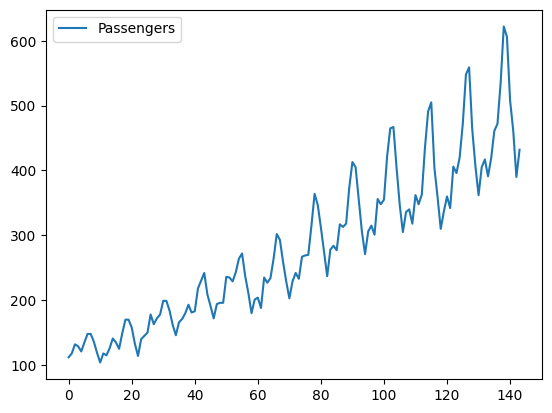

In [6]:
#gold_data.plot(x='Date',y='gold_price')
passenger_data.plot()

In [7]:
a = torch.tensor([1.0, 112])
b = torch.tensor([2.0, 118])
c = torch.tensor([3.0, 132])
d = torch.tensor([4.0, 121])

In [8]:
y = c * b
y

tensor([6.0000e+00, 1.5576e+04])

In [9]:
# creating tensor from targets_df 
passenger_tensor = torch.tensor(passenger_data['Passengers'].values)

# printing out result
print(passenger_tensor)

tensor([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
        141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163,
        172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218,
        230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272,
        237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229,
        203, 229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
        284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301,
        356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348,
        363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
        548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606,
        508, 461, 390, 432])


In [12]:
passenger_tensor.data[-24:-12]

tensor([360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405])

In [10]:
passenger_tensor.data[-12:]

tensor([417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])

In [11]:
passenger_tensor.data[:-12]

tensor([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
        141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163,
        172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218,
        230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272,
        237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229,
        203, 229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
        284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301,
        356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348,
        363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
        548, 559, 463, 407, 362, 405])

In [13]:
train = passenger_tensor.data[:-24]
test = passenger_tensor.data[-24:-12] #last 12 months
validation = passenger_tensor.data[-12:]

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
            out = self.linear(x)
            return out

model = LinearRegression()

# Define loss function and optimizer
criterion = MeanAbsolutePercentageError()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train model
for epoch in range(100):
    # Forward pass
    y_pred = model(x_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backward pass and optimize weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test model
    with torch.no_grad():
        y_pred_test = model(x_test)
        test_loss = criterion(y_pred_test, y_test)

    return test_loss.item()